In [1]:
import pandas as pd

# Load the NBA high scorers dataset from CSV
df = pd.read_csv('nba_high_scorers_outliers.csv')

# Display the first 5 rows to get a sense of the data
print(df.head())

# Show info about columns, types, and missing values
print(df.info())

# Show summary statistics for numeric features
print(df.describe())

    Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0   18  Giannis Antetokounmpo  PF   24  MIL  72  72  32.8  10.0  17.3  ...   
1   40           Bradley Beal  SG   25  WAS  82  82  36.9   9.3  19.6  ...   
2   61           Devin Booker  SG   22  PHO  64  64  35.0   9.2  19.6  ...   
3  124          Stephen Curry  PG   30  GSW  69  69  33.8   9.2  19.4  ...   
4  126          Anthony Davis   C   25  NOP  56  56  33.0   9.5  18.3  ...   

   ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Year  
0  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7  2019  
1  1.1   3.9   5.0  5.5  1.5  0.7  2.7  2.8  25.6  2019  
2  0.6   3.5   4.1  6.8  0.9  0.2  4.1  3.1  26.6  2019  
3  0.7   4.7   5.3  5.2  1.3  0.4  2.8  2.4  27.3  2019  
4  3.1   8.9  12.0  3.9  1.6  2.4  2.0  2.4  25.9  2019  

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -----

In [2]:
# Check for missing values in each column
print(df.isnull().sum())

# Drop rows where the target (PTS) is missing
df = df.dropna(subset=['PTS'])

# Fill other missing values with zero (simple strategy)
df = df.fillna(0)

# Remove duplicate rows based on Player and Year
df = df.drop_duplicates(subset=['Player', 'Year'])

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64


In [3]:
# List columns to drop: identifiers and the target
drop_cols = ['Rk', 'Player', 'Tm', 'PTS']  # 'PTS' is our target

# Separate features (X) and target (y)
X = df.drop(columns=drop_cols)
y = df['PTS']

# Convert categorical 'Pos' (position) into dummy/indicator variables
X = pd.get_dummies(X, columns=['Pos'], drop_first=True)

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

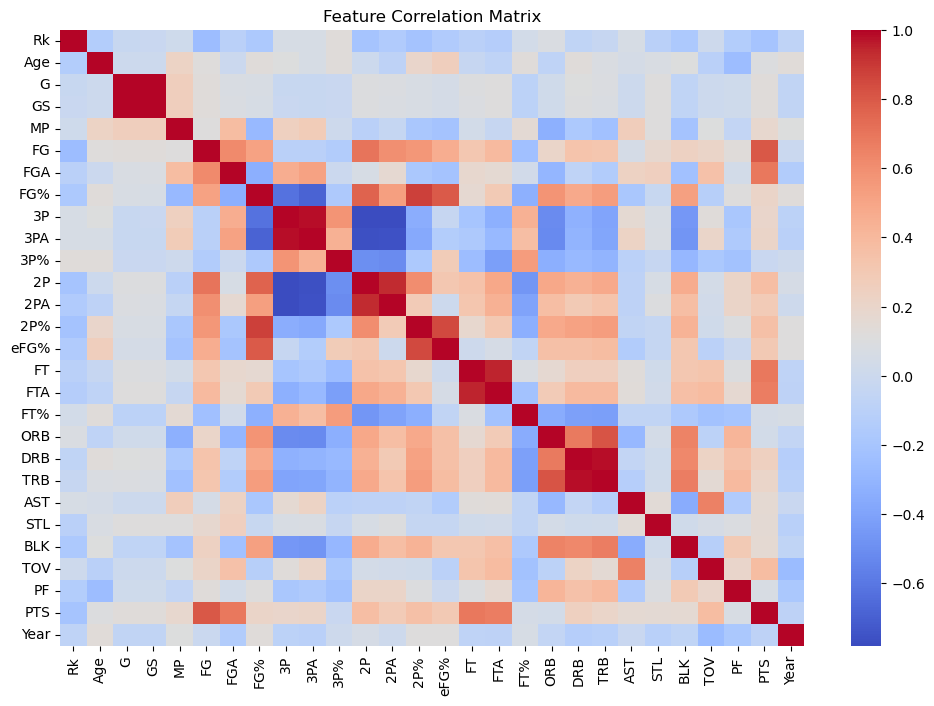

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot a correlation heatmap for all numeric features
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")   # Mean absolute Error
print(f"RMSE: {rmse:.2f}")   # Root Mean Squared Error
print(f"R^2 Score: {r2:.2f}")  # R-Squared score


MAE: 0.84
RMSE: 1.31
R^2 Score: 0.83


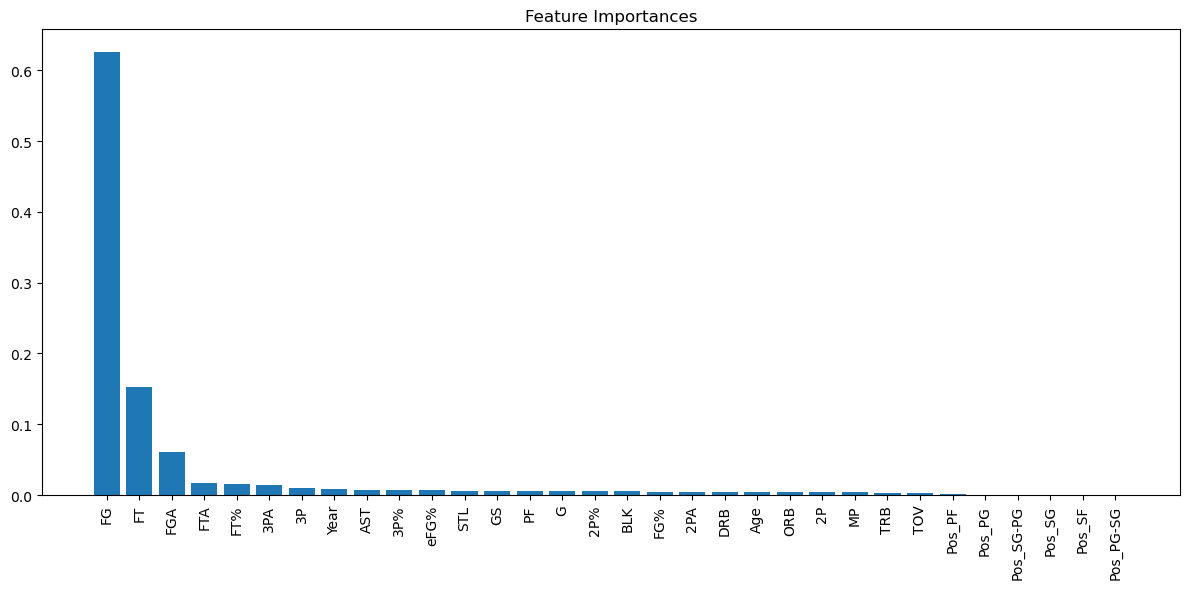

In [10]:
import numpy as np

# Get feature importances from the trained model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [11]:
import joblib

# Save the trained model to a file for future use
joblib.dump(rf, 'nba_pts_predictor_rf.pkl')

['nba_pts_predictor_rf.pkl']